# Assignment 1

In [3]:
# first, install the necessary packages in the terminal using the following commands
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib
# pip install pandas

In [4]:
import os
import sys
sys.path.append("../../..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from imutils import jimshow as show
from imutils import jimshow_channel as show_channel
# plotting
import matplotlib.pyplot as plt
# pandas for making dataframes
import pandas as pd

In [5]:
#creating a filepath to the specific image we are working with. the .jpg can be replaced with another from the same directory
filepath = os.path.join("..", "input", "flowers", "image_0001.jpg")

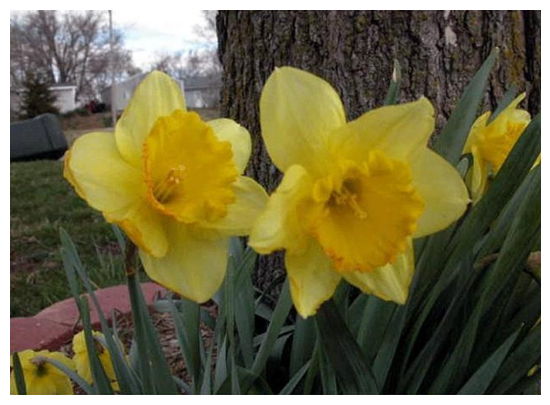

In [12]:
# showing the chosen flower
image_flower = cv2.imread(filepath)
show(image_flower)

In [7]:
# create a histogram for the chosen flower image
hist_flower = cv2.calcHist([image_flower], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
normalized_hist_flower = cv2.normalize(hist_flower, hist_flower, 0, 1.0, cv2.NORM_MINMAX)

In [8]:
# loop to make normalized histograms for every file
datapath_data = os.path.join("..", "input", "flowers")
filelist_data = sorted(os.listdir(datapath_data))
# make empty list for distance scores to be added to
distance_scores = []

for files in filelist_data:
    filepath_data = datapath_data + "/" + files
    image_data = cv2.imread(filepath_data)
    hist_data = cv2.calcHist([image_data], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
    normalized_hist_data = cv2.normalize(hist_data, hist_data, 0, 1.0, cv2.NORM_MINMAX)
    distance = round(cv2.compareHist(normalized_hist_flower, normalized_hist_data, cv2.HISTCMP_CHISQR), 2)

    # create list for every file
    file_info = [files, distance]
    # append the file's info to the collected list for the whole folder's info
    distance_scores.append(file_info)

# creating a dataframe with pandas using folder_info
df = pd.DataFrame(distance_scores,
                    columns=["Filename", "Distance"])

# sort the dataframe by shortest distance, and show the first 5 results and the flower we selected in the beginning
df = df.sort_values(by=['Distance'])[:6]

# upload dataframe to output folder
outpath = os.path.join("..", "output", "flowercomparison.csv")
df.to_csv(outpath, index=False)

In [45]:
distance_scores

[['image_0001.jpg', 0.0],
 ['image_0002.jpg', 6650.67],
 ['image_0003.jpg', 14397.72],
 ['image_0004.jpg', 196.46],
 ['image_0005.jpg', 9006.81],
 ['image_0006.jpg', 9252.33],
 ['image_0007.jpg', 862.94],
 ['image_0008.jpg', 13735.06],
 ['image_0009.jpg', 433.95],
 ['image_0010.jpg', 10954.23],
 ['image_0011.jpg', 114960.36],
 ['image_0012.jpg', 793.85],
 ['image_0013.jpg', 13134.0],
 ['image_0014.jpg', 40468.95],
 ['image_0015.jpg', 11536.67],
 ['image_0016.jpg', 16147.03],
 ['image_0017.jpg', 204.6],
 ['image_0018.jpg', 197.55],
 ['image_0019.jpg', 48122.39],
 ['image_0020.jpg', 361.99],
 ['image_0021.jpg', 678.99],
 ['image_0022.jpg', 309.82],
 ['image_0023.jpg', 8633.13],
 ['image_0024.jpg', 27663.71],
 ['image_0025.jpg', 259.76],
 ['image_0026.jpg', 20337.61],
 ['image_0027.jpg', 403.34],
 ['image_0028.jpg', 3425.49],
 ['image_0029.jpg', 25947.1],
 ['image_0030.jpg', 5812.52],
 ['image_0031.jpg', 523.47],
 ['image_0032.jpg', 333.01],
 ['image_0033.jpg', 15541.64],
 ['image_0034.jp

In [9]:
# show dataframe
df

,Filename,Distance
0,image_0001.jpg,0.00
927,image_0928.jpg,178.12
875,image_0876.jpg,188.55
772,image_0773.jpg,190.08
141,image_0142.jpg,190.21
1315,image_1316.jpg,190.22


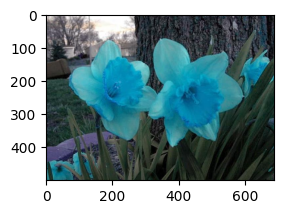

In [38]:
fig = plt.figure(figsize=(10, 7)) 
# setting values to rows and column variables 
rows = 2
columns = 3
counter = 2
image_flower = cv2.imread(filepath)
fig.add_subplot(rows, columns, 1)
plt.imshow(image_flower)

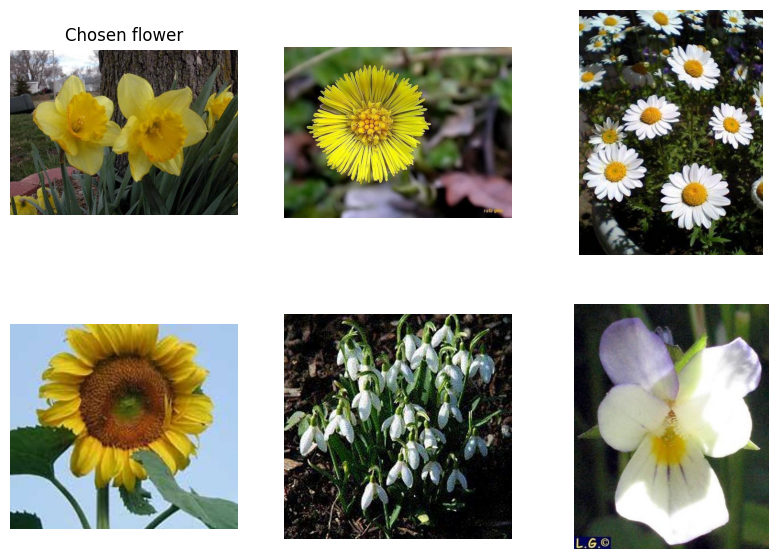

In [42]:
#creating a grid of the results
fig = plt.figure(figsize=(10, 7)) 

# setting the number of rows and columns
rows = 2
columns = 3

counter = 2 # counter will be used to indicate where to place the image in the grid

image_flower = cv2.imread(filepath)
fig.add_subplot(rows, columns, 1) # add new plot to grid
plt.imshow(image_flower[:,:,::-1]) # showing flower, switching from BGR to RGB
plt.axis('off') # dont show axes
plt.title("Chosen flower")

for flower in df["Filename"][1:6]:
    similar_flower = datapath_data + "/" + flower
    image_similar_flower = cv2.imread(similar_flower)
    fig.add_subplot(rows, columns, counter) # add new plot to grid
    plt.imshow(image_similar_flower[:,:,::-1]) # showing flower, switching from BGR to RGB
    plt.axis('off') # dont show axes
    counter += 1

plt.savefig('output/results.png') # save results
